In [ ]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

In [90]:
path = r"EconomicTracker-main/data" # use your path
all_files = glob.glob(path + "/*.csv")

li = {}

for filename in all_files:
    try:
        df = pd.read_csv(filename, index_col=None, header=0)
        filename = filename.split("/")[-1]
        name,reg,dur = tuple(filename.split("-"))
        dur = dur[1:-4]
        name = name[:-1]
        reg = reg[1:-1]
        if not name in li:
            li[name] = {}
        # if not reg in li[name]:
        #     li[name][reg] = {}
        df =df.replace(".","0")
        #print()
        for cl in df.columns:
            try:
                dtype_dict = {}
                if df[cl].dtypes == "object":
                    dtype_dict[cl] = "float64"
                df = df.astype(dtype_dict)
            except Exception as e:
                print(filename,cl,e)

        li[name][reg] = df
    except:
        print(filename)

#print(li)

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (4,5,6,7,8,9,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
GeoIDs - City.csv
GeoIDs - State.csv
/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
GeoIDs - County.csv


In [91]:
classes = []
for key in li:
    classes.append(key)
    #print(li[key]["City"]["Daily"])

In [86]:
classes

['COVID',
 'UI Claims',
 'Affinity',
 'Google Mobility',
 'Womply Merchants',
 'Womply Revenue',
 'Employment Combined',
 'Zearn',
 'Burning Glass']

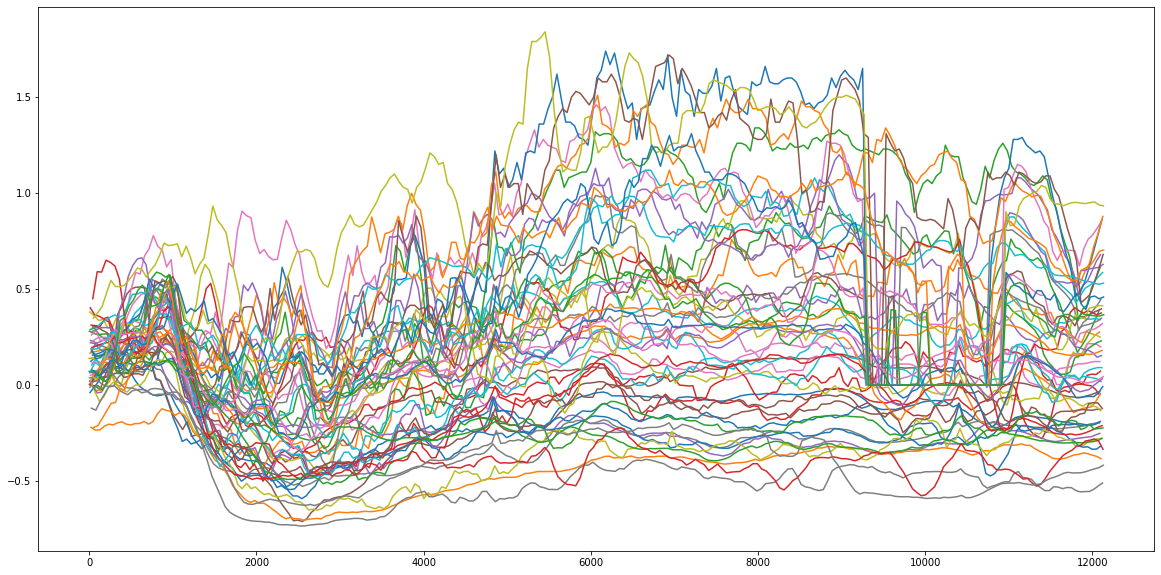

In [92]:
key = "Google Mobility"
for city in li[key]["City"]["cityid"].unique():
    temp = li[key]["City"]
    plt.plot(temp[temp["cityid"] == city]["gps_parks"])

In [93]:
key = "Google Mobility"
li[key]["City"].dtypes

year                           int64
month                          int64
day                            int64
cityid                         int64
gps_retail_and_recreation    float64
gps_grocery_and_pharmacy     float64
gps_parks                    float64
gps_transit_stations         float64
gps_workplaces               float64
gps_residential              float64
gps_away_from_home           float64
dtype: object

In [94]:
li[key]["City"]

,year,month,day,cityid,gps_retail_and_recreation,gps_grocery_and_pharmacy,gps_parks,gps_transit_stations,gps_workplaces,gps_residential,gps_away_from_home
0,2020,2,24,1,0.00571,-0.00286,0.07140,0.00286,0.0214,-0.00143,0.000625
1,2020,2,24,2,0.02000,-0.02410,0.13900,-0.02060,-0.0326,0.01160,-0.009070
2,2020,2,24,3,0.04000,0.02710,0.28100,0.03290,0.0257,-0.00857,0.014700
3,2020,2,24,4,0.02140,-0.00714,0.00286,-0.00286,0.0229,0.00286,-0.002060
4,2020,2,24,5,0.03290,-0.00143,0.03860,0.04710,0.0100,0.00286,-0.004610
...,...,...,...,...,...,...,...,...,...,...,...
12132,2020,10,9,49,-0.09570,0.04570,0.93400,-0.14000,-0.2900,0.06140,-0.066700
12133,2020,10,9,50,-0.17900,-0.03570,0.53100,-0.39600,-0.2840,0.07430,-0.083900
12134,2020,10,9,51,-0.06290,-0.00571,0.45900,-0.39900,-0.2660,0.06710,-0.075500
12135,2020,10,9,52,-0.07570,0.03000,0.70400,-0.13300,-0.2530,0.05710,-0.063200


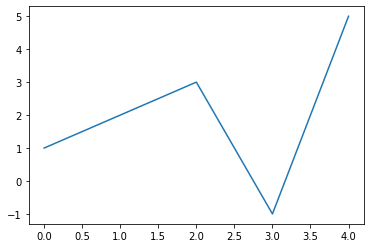

In [28]:
plt.plot([1,2,3,-1,5])

In [74]:
# key = "Google Mobility"
# for city in li[key]["City"]["Daily"]["cityid"].unique():
#     temp = li[key]["City"]["Daily"]
#     plt.plot(temp[temp["cityid"] == city]["gps_parks"])
temp = li["Google Mobility"]["City"]["Daily"]
a = temp[["cityid","gps_parks"]]
b = temp[["cityid","gps_transit_stations"]]

In [66]:
import tensorflow

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler


In [71]:
len(a),len(b)

(12137, 12137)

In [ ]:
d = b["gps_transit_station"]
c = a["gps_parks"]
scaler=MinMaxScaler(feature_range=(0,1))
final_data = data.values
train_data= a[0:200*53].values
valid_data= b[200*53:].values
#data.index=data.Date
#data.drop(“Date”,axis=1,inplace=True)
#scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_data)
x_train_data,y_train_data=[],[]
temp = li.copy()
for key in classes:
    temp_1 = temp[key]["City"]["Daily"]
    temp_1 = temp_1[temp_1["cityid"] == 1] 
    temp[key]["City"]["Daily"] = temp_1
temp = temp[]
for i in range(30,len(train_data)/229):
    addend = []
    for key in classes:
        temp = li[key]["City"]["Daily"]
        temp = temp[temp["cityid"] == 1] 
        addend += temp
    x_train_data.append(d[i-60*53:i])
    y_train_data.append(c[i])

In [88]:
key = "Google Mobility"
temp = li[key]["City"]["Daily"]
temp = temp[temp["cityid"] == 1] 
len(temp)

229

In [96]:
classes = [ 'Affinity',
 'Google Mobility',
 'Womply Merchants',
 'Womply Revenue',
 'Employment Combined']

In [97]:
temp = li.copy()
for key in classes:
    temp_1 = temp[key]["City"]
    temp_1 = temp_1[temp_1["cityid"] == 1] 
    temp[key]["City"] = temp_1
    

In [351]:
a = []
b = []
#a
#a.append(list(temp["Employment Combined"]["City"]["emp_combined"][:]))
#b
# a.append(list(temp["Employment Combined"]["City"]["emp_combined_inclow"][:]))
# a.append(list(temp["Employment Combined"]["City"]["emp_combined_inhigh"][:]))
# a.append(list(temp["Employment Combined"]["City"]["emp_combined_incmiddle"][:]))
for i in temp["Employment Combined"]["City"]:
    if "emp" in i:
        a.append(list(temp["Employment Combined"]["City"][i][:]))
        b.append("Employment Combined" + i)
#d
# print(temp["Employment Combined"]["City"].iloc[-1])
# print(temp["Affinity"]["City"].iloc[-38])
# print(temp["Womply Merchants"]["City"].iloc[-40])
#e
#a.append(list(temp["Womply Revenue"]["City"]["revenue_all"][4:-39]))
for i in temp["Womply Revenue"]["City"]:
    if "revenue" in i:
        a.append(list(temp["Womply Revenue"]["City"][i][4:-39]))
        b.append("Womply Revenue" + i)
for i in temp["Womply Merchants"]["City"]:
    if "merchants" in i:
        a.append(list(temp["Womply Merchants"]["City"][i][4:-39]))
        b.append("Womply Merchants" + i)
# a.append(list(temp["Womply Merchants"]["City"]["merchants_all"][4:-39]))
# a.append(list(temp["Affinity"]["City"]["spend_all"][372:-37]))
for i in temp["Affinity"]["City"]:
    if "spend" in i:
        a.append(list(temp["Affinity"]["City"][i][372:-37]))
        b.append("Affinity" + i)
# a.append(list(temp["Affinity"]["City"]["spend_tws"][372:-37]))
# a.append(list(temp["Affinity"]["City"]["spend_tws"][372:-37]))
# a.append(list(temp["Affinity"]["City"]["spend_tws"][372:-37]))
# a.append(list(temp["Affinity"]["City"]["spend_tws"][372:-37]))




In [352]:
# a = []
# a.append(temp["Employment Combined"]["City"]["emp_combined"])
# print(temp["Employment Combined"]["City"].iloc[-1])
# #b
# a.append(temp["Employment Combined"]["City"]["emp_combined_inclow"])
# #c
# a.append(temp["Affinity"]["City"]["spend_all"])
# #d
# print(temp["Affinity"]["City"].iloc[-38])
# a.append(temp["Womply Merchants"]["City"]["merchants_all"])
# #e
# print(temp["Womply Merchants"]["City"].iloc[-40])
# a.append(temp["Womply Revenue"]["City"]["revenue_all"])

In [353]:
idx = b.index('Affinityspend_tws')

In [354]:
len(temp["Affinity"]["City"]["spend_all"])

630

In [355]:
pd.DataFrame(a).transpose()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-0.006430,-0.000328,-0.008310,-0.004400,-0.00232,-0.00413,0.0107,0.0228,-0.02510,-0.00592,...,-0.00370,0.001270,-0.00405,-0.003090,0.000753,0.00396,0.03340,0.00305,-0.03000,-0.03680
1,-0.004550,-0.002370,-0.005660,-0.002900,0.00128,0.00303,0.0201,0.0388,-0.01400,-0.00538,...,0.00541,-0.001430,-0.00554,0.002520,-0.005210,0.02150,0.02770,-0.00133,-0.00480,-0.02060
2,-0.002840,-0.003910,-0.003290,-0.001580,0.00644,0.01440,0.0131,0.0263,-0.00246,-0.00127,...,0.00819,-0.000746,-0.00393,0.006740,-0.016100,0.02570,0.02200,-0.00144,-0.00258,-0.00945
3,-0.001280,-0.004940,-0.001170,-0.000402,0.02630,0.03070,0.0280,0.0425,0.00587,0.01080,...,0.01530,0.004930,0.00410,0.004330,-0.025800,0.01350,0.02010,-0.00677,0.00499,0.01550
4,0.000133,-0.005620,0.000735,0.000633,0.03560,0.03740,0.0220,0.0660,0.02020,0.01960,...,0.02210,0.002490,0.00979,-0.000743,-0.053500,0.01390,0.00726,-0.00892,0.03040,0.03250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,-0.117000,-0.221000,-0.124000,-0.070100,-0.28400,-0.16100,-0.1250,-0.2440,-0.62200,-0.30000,...,-0.16000,-0.219000,-0.39400,-0.463000,-0.700000,-0.14400,-0.35100,0.13700,-0.16100,-0.62700
217,-0.116000,-0.222000,-0.123000,-0.069400,-0.29000,-0.17200,-0.1370,-0.2210,-0.62400,-0.30100,...,-0.16700,-0.217000,-0.39100,-0.465000,-0.708000,-0.14400,-0.35600,0.12800,-0.15800,-0.62900
218,-0.115000,-0.223000,-0.122000,-0.068700,-0.29700,-0.18200,-0.1410,-0.2350,-0.62700,-0.30000,...,-0.16700,-0.218000,-0.39200,-0.467000,-0.709000,-0.14300,-0.36900,0.13300,-0.15700,-0.62900
219,-0.115000,-0.224000,-0.121000,-0.068000,-0.29700,-0.18200,-0.1470,-0.2180,-0.62500,-0.30100,...,-0.17400,-0.220000,-0.39000,-0.466000,-0.722000,-0.14400,-0.36300,0.14000,-0.17100,-0.62500


In [363]:
data = pd.DataFrame(a).transpose()
data.columns = list(range(len(b)))
len(a)
n = len(a)

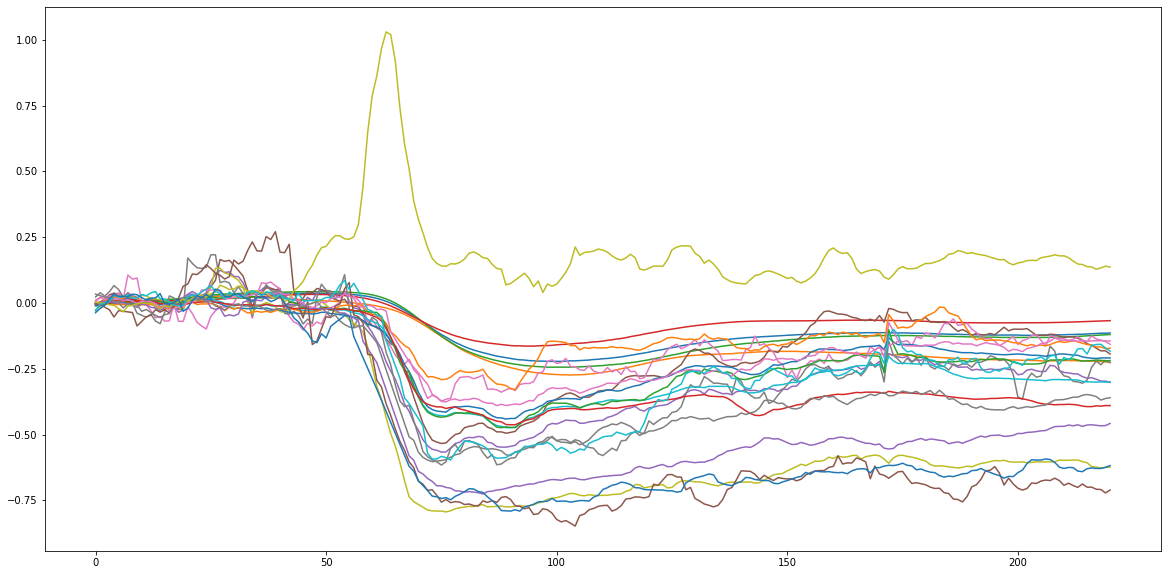

In [413]:

for i in a:
    plt.plot(i)
plt.savefig("all_param.jpg")

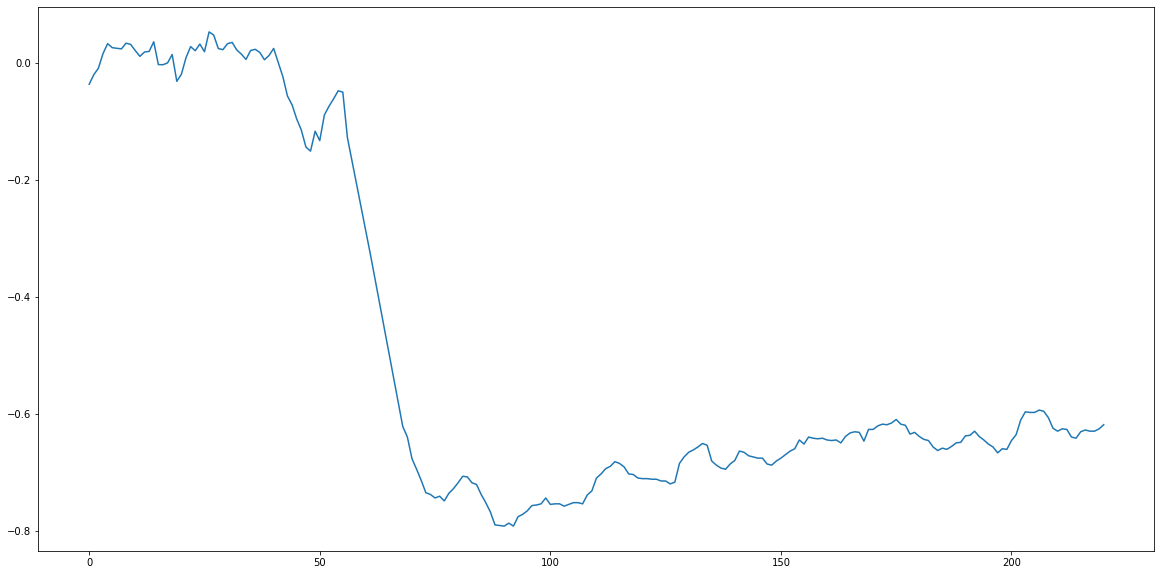

In [414]:
plt.plot(a[idx])
plt.savefig("spend.jpg")

In [366]:
data

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-0.006430,-0.000328,-0.008310,-0.004400,-0.00232,-0.00413,0.0107,0.0228,-0.02510,-0.00592,...,-0.00370,0.001270,-0.00405,-0.003090,0.000753,0.00396,0.03340,0.00305,-0.03000,-0.03680
1,-0.004550,-0.002370,-0.005660,-0.002900,0.00128,0.00303,0.0201,0.0388,-0.01400,-0.00538,...,0.00541,-0.001430,-0.00554,0.002520,-0.005210,0.02150,0.02770,-0.00133,-0.00480,-0.02060
2,-0.002840,-0.003910,-0.003290,-0.001580,0.00644,0.01440,0.0131,0.0263,-0.00246,-0.00127,...,0.00819,-0.000746,-0.00393,0.006740,-0.016100,0.02570,0.02200,-0.00144,-0.00258,-0.00945
3,-0.001280,-0.004940,-0.001170,-0.000402,0.02630,0.03070,0.0280,0.0425,0.00587,0.01080,...,0.01530,0.004930,0.00410,0.004330,-0.025800,0.01350,0.02010,-0.00677,0.00499,0.01550
4,0.000133,-0.005620,0.000735,0.000633,0.03560,0.03740,0.0220,0.0660,0.02020,0.01960,...,0.02210,0.002490,0.00979,-0.000743,-0.053500,0.01390,0.00726,-0.00892,0.03040,0.03250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,-0.117000,-0.221000,-0.124000,-0.070100,-0.28400,-0.16100,-0.1250,-0.2440,-0.62200,-0.30000,...,-0.16000,-0.219000,-0.39400,-0.463000,-0.700000,-0.14400,-0.35100,0.13700,-0.16100,-0.62700
217,-0.116000,-0.222000,-0.123000,-0.069400,-0.29000,-0.17200,-0.1370,-0.2210,-0.62400,-0.30100,...,-0.16700,-0.217000,-0.39100,-0.465000,-0.708000,-0.14400,-0.35600,0.12800,-0.15800,-0.62900
218,-0.115000,-0.223000,-0.122000,-0.068700,-0.29700,-0.18200,-0.1410,-0.2350,-0.62700,-0.30000,...,-0.16700,-0.218000,-0.39200,-0.467000,-0.709000,-0.14300,-0.36900,0.13300,-0.15700,-0.62900
219,-0.115000,-0.224000,-0.121000,-0.068000,-0.29700,-0.18200,-0.1470,-0.2180,-0.62500,-0.30100,...,-0.17400,-0.220000,-0.39000,-0.466000,-0.722000,-0.14400,-0.36300,0.14000,-0.17100,-0.62500


In [367]:
li["Google Mobility"]["City"]

,year,month,day,cityid,gps_retail_and_recreation,gps_grocery_and_pharmacy,gps_parks,gps_transit_stations,gps_workplaces,gps_residential,gps_away_from_home
0,2020,2,24,1,0.00571,-0.00286,0.0714,0.00286,0.0214,-0.00143,0.000625
53,2020,2,25,1,0.01000,-0.00143,0.0743,0.00429,0.0229,-0.00286,0.002020
106,2020,2,26,1,0.01570,0.00286,0.0714,0.00571,0.0243,-0.00429,0.003620
159,2020,2,27,1,0.01860,0.00571,0.0757,0.00714,0.0243,-0.00429,0.003620
212,2020,2,28,1,0.02290,0.01140,0.0800,0.01000,0.0257,-0.00571,0.005000
...,...,...,...,...,...,...,...,...,...,...,...
11872,2020,10,5,1,-0.29900,-0.12100,-0.2100,-0.38100,-0.3290,0.11100,-0.132000
11925,2020,10,6,1,-0.29700,-0.11900,-0.2070,-0.37900,-0.3290,0.11100,-0.132000
11978,2020,10,7,1,-0.29900,-0.12000,-0.2030,-0.37700,-0.3290,0.11100,-0.132000
12031,2020,10,8,1,-0.30000,-0.12400,-0.1990,-0.37900,-0.3300,0.11100,-0.132000


In [372]:
#scaler=MinMaxScaler(feature_range=(0,1))
final_data = data.values
train_data=final_data[0:190,:]
valid_data=final_data[190:,:]
# data.index=data.Date
# data.drop(“Date”,axis=1,inplace=True)
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_data)
x_train_data,y_train_data=[],[]
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,:])
    y_train_data.append(scaled_data[i,idx])

In [373]:
final_data.shape

(221, 21)

In [374]:
x_train_data = np.array(x_train_data).reshape(-1,60*n,1)
y_train_data = np.array(y_train_data)
data.shape

(221, 21)

In [375]:
final_data.shape

(221, 21)

In [376]:
y_train_data.shape

(130,)

In [377]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
# model_data=data[len(data)-len(valid_data)-60:].values
# print(model_data.shape)
# model_data=model_data.reshape(-1,1)
# print(model_data.shape)
# model_data=scaler.transform(model_data)

In [378]:
lstm_model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_38 (LSTM)               (None, 1260, 50)          10400     
_________________________________________________________________
lstm_39 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [379]:
x_train_data.shape

(130, 1260, 1)

In [380]:
lstm_model.compile(loss="mean_squared_error",optimizer="adam")
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)
# X_test=[]
# for i in range(60,model_data.shape[0]):
#     X_test.append(model_data[i-60:i,0])
# X_test=np.array(X_test)
# X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

130/130 - 51s - loss: 0.0020


In [381]:
x_test_data = []
y_test_data = []
for i in range(60,221):
    x_test_data.append(scaled_data[i-60:i,:])
    y_test_data.append(scaled_data[i,4])

In [384]:
x_test_data = np.array(x_test_data).reshape(-1,60*n,1)
y_test_data = np.array(y_test_data)
x_test_data.shape

(161, 1260, 1)

In [386]:

ans = lstm_model.predict(x_test_data)

ans = np.hstack((np.zeros((ans.shape[0], n-1),dtype=ans.dtype),ans))

price = scaler.inverse_transform(ans)

In [387]:
data

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-0.006430,-0.000328,-0.008310,-0.004400,-0.00232,-0.00413,0.0107,0.0228,-0.02510,-0.00592,...,-0.00370,0.001270,-0.00405,-0.003090,0.000753,0.00396,0.03340,0.00305,-0.03000,-0.03680
1,-0.004550,-0.002370,-0.005660,-0.002900,0.00128,0.00303,0.0201,0.0388,-0.01400,-0.00538,...,0.00541,-0.001430,-0.00554,0.002520,-0.005210,0.02150,0.02770,-0.00133,-0.00480,-0.02060
2,-0.002840,-0.003910,-0.003290,-0.001580,0.00644,0.01440,0.0131,0.0263,-0.00246,-0.00127,...,0.00819,-0.000746,-0.00393,0.006740,-0.016100,0.02570,0.02200,-0.00144,-0.00258,-0.00945
3,-0.001280,-0.004940,-0.001170,-0.000402,0.02630,0.03070,0.0280,0.0425,0.00587,0.01080,...,0.01530,0.004930,0.00410,0.004330,-0.025800,0.01350,0.02010,-0.00677,0.00499,0.01550
4,0.000133,-0.005620,0.000735,0.000633,0.03560,0.03740,0.0220,0.0660,0.02020,0.01960,...,0.02210,0.002490,0.00979,-0.000743,-0.053500,0.01390,0.00726,-0.00892,0.03040,0.03250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,-0.117000,-0.221000,-0.124000,-0.070100,-0.28400,-0.16100,-0.1250,-0.2440,-0.62200,-0.30000,...,-0.16000,-0.219000,-0.39400,-0.463000,-0.700000,-0.14400,-0.35100,0.13700,-0.16100,-0.62700
217,-0.116000,-0.222000,-0.123000,-0.069400,-0.29000,-0.17200,-0.1370,-0.2210,-0.62400,-0.30100,...,-0.16700,-0.217000,-0.39100,-0.465000,-0.708000,-0.14400,-0.35600,0.12800,-0.15800,-0.62900
218,-0.115000,-0.223000,-0.122000,-0.068700,-0.29700,-0.18200,-0.1410,-0.2350,-0.62700,-0.30000,...,-0.16700,-0.218000,-0.39200,-0.467000,-0.709000,-0.14300,-0.36900,0.13300,-0.15700,-0.62900
219,-0.115000,-0.224000,-0.121000,-0.068000,-0.29700,-0.18200,-0.1470,-0.2180,-0.62500,-0.30100,...,-0.17400,-0.220000,-0.39000,-0.466000,-0.722000,-0.14400,-0.36300,0.14000,-0.17100,-0.62500


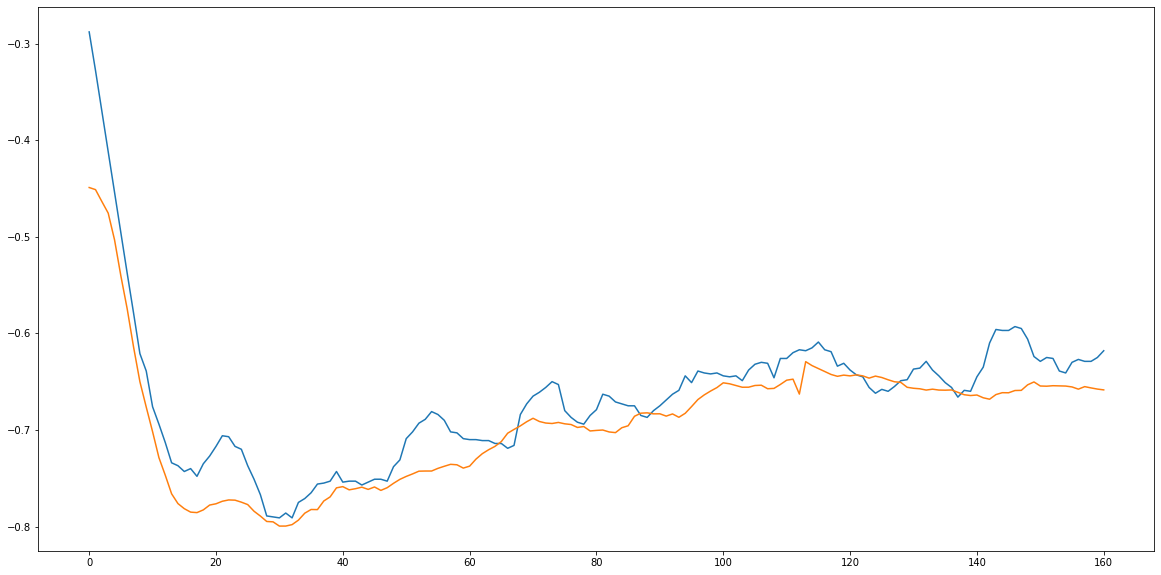

In [415]:
true = list(data.iloc[60:,-1])
pred = list(price[:,-1])
plt.plot(true)
plt.plot(pred)
plt.savefig("result.jpg")

In [409]:
diff = [abs(true[i] - pred[i]) for i in range(len(true))]
sum(diff)/len(diff)
#max(diff) 

0.026882567617463764

In [395]:
price

array([[-0.22199999, -0.274     , -0.244     , ..., -0.0342    ,
        -0.597     , -0.44907025],
       [-0.22199999, -0.274     , -0.244     , ..., -0.0342    ,
        -0.597     , -0.45124954],
       [-0.22199999, -0.274     , -0.244     , ..., -0.0342    ,
        -0.597     , -0.46355754],
       ...,
       [-0.22199999, -0.274     , -0.244     , ..., -0.0342    ,
        -0.597     , -0.65648705],
       [-0.22199999, -0.274     , -0.244     , ..., -0.0342    ,
        -0.597     , -0.65768486],
       [-0.22199999, -0.274     , -0.244     , ..., -0.0342    ,
        -0.597     , -0.65852875]], dtype=float32)

In [336]:
for keys in li:
    print(keys)
    for p in li[keys]:
        print(p,end = "")
    print(keys)

COVID
CountyCityStateNationalCOVID
UI Claims
NationalCountyCityStateUI Claims
Affinity
NationalStateCityCountyAffinity
Google Mobility
CityNationalCountyStateGoogle Mobility
Womply Merchants
NationalStateCityWomply Merchants
Womply Revenue
CityNationalStateWomply Revenue
Employment Combined
CountyNationalStateCityEmployment Combined
Zearn
CityStateCountyNationalZearn
Burning Glass
StateCityNationalBurning Glass
